the average loss value is: 122.0


,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,L/100km_city-mpg,horsepower_binnes,fuel-type-diesel,fuel-type-gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.00,111,5000.0,21,27,13495.0,11.190476,medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.00,111,5000.0,21,27,16500.0,11.190476,medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.00,154,5000.0,19,26,16500.0,12.368421,medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.00,102,5500.0,24,30,13950.0,9.791667,medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.00,115,5500.0,18,22,17450.0,13.055556,medium,0,1
5,2,122,audi,std,two,sedan,fwd,front,99.8,0.851994,...,8.50,110,5500.0,19,25,15250.0,12.368421,medium,0,1
6,1,158,audi,std,four,sedan,fwd,front,105.8,0.925997,...,8.50,110,5500.0,19,25,17710.0,12.368421,medium,0,1
7,1,122,audi,std,four,wagon,fwd,front,105.8,0.925997,...,8.50,110,5500.0,19,25,18920.0,12.368421,medium,0,1
8,1,158,audi,turbo,four,sedan,fwd,front,105.8,0.925997,...,8.30,140,5500.0,17,20,23875.0,13.823529,medium,0,1
10,2,192,bmw,std,two,sedan,rwd,front,101.2,0.849592,...,8.80,101,5800.0,23,29,16430.0,10.217391,medium,0,1


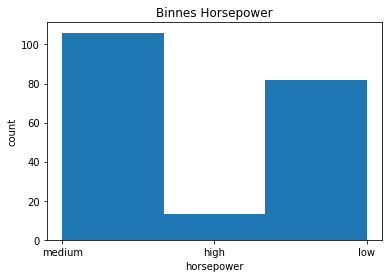

In [210]:
#importing libraries

%matplotlib inline
import matplotlib as plt
import pandas as pd
import numpy as np
from matplotlib import pyplot 


#reading csv file stored in the local directory,where the pyhton file is stored(205 rows X 26 columns)
df=pd.read_csv('auto.csv')

#default data frame from CSV file does not have header in it. So assigning headers to the DF.
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]

#assigning headers to auto.csv file. If for instance price header is not included in the list headers, the whole column will dissapear. 
df=pd.read_csv('auto.csv',names= headers)



df.head(20) #testing


#replacing ? with Nan.  
#np.nan is a numpy function, we can replace using any string or variable. "Inplace = True" executes and displays the df as soon as the code is executed. 
df.replace("?", np.nan, inplace=True)

#Finding missing data. Returns a Boolean , if the cell is empty returns True becuase it isnull else return false.

missing_data=df.isnull()
#OR df.notnull() returns opposite. 


#finding out how many true or false column(isnull) is there in every column. "value.counts" counts the number of values.

#for column in missing_data.columns.values.tolist():
    #print(column)
    #print(missing_data[column].value_counts())
    #print("")
    
#finding mean value to replace it with the blank values in normalized-losses column, since the data was (int) we need to change it to float.     
mean= df['normalized-losses'].astype(float).mean(axis=0)
print("the average loss value is:", mean)

df['normalized-losses'].replace(np.nan, mean, inplace = True)


#doing the same with the bore column
mean_bore =df['bore'].astype(float).mean(axis=0)

df['bore'].replace(np.nan, mean, inplace = True)

df

#For finding out the number of values in a column-value_counts(), idxmax() returns the max occuring value with its value. 
df['bore'].value_counts().idxmax()

df

df['num-of-doors'].replace(np.nan, 'four', inplace= True)
df['num-of-doors'].head(30)

#dropping rows with no values in the price column , since price cannot be replaced by guessing or mean or such values. 
df.dropna(subset=['price'], axis=0,inplace= True)

#Change bore,price,peak-rpm and stroke to "float" type , normalized-losses to "int", 

df[['bore', 'price', 'peak-rpm', 'stroke']]=df[['bore', 'price', 'peak-rpm','stroke']].astype("float")
df['normalized-losses']=df["normalized-losses"].astype("int")
df.dtypes #testing
df
# Convert mpg to L/100km by mathematical operation (235 divided by mpg)

df['L/100km_city-mpg'] = 235/df['city-mpg']
df.dtypes

#NORMALIZATION (simple feature scaling)
df['length']=(df['length'])/(df['length']).max()

df['height']=(df['length'])/(df['length']).max()

df['width']= (df['width'])/(df['width']).max()

df[['height','width','length']].head() #testing

#Binning
#since it had nan value we could not change it to int, so replacing nan

df['horsepower'].replace(np.nan, 0, inplace= True)
df["horsepower"]=df["horsepower"].astype(int, copy=True)

#creating 3 bins

bins=np.linspace(df["horsepower"].min(),df["horsepower"].max(),4)
bins #testing

group_names=['low','medium','high']
df['horsepower_binnes']= pd.cut(df['horsepower'],bins,labels=group_names,include_lowest=True)

df[['horsepower','horsepower_binnes']].head(50) #displays variables in horsepower column and also binnes column

df["horsepower_binnes"].value_counts() #displays total values of each bin

#Plotting the horsepower_binnes -bin into a histogram using matplotlib

pyplot.hist(df['horsepower_binnes'], bins=3)

#for designing the graph
plt.pyplot.xlabel('horsepower')
plt.pyplot.ylabel('count')
plt.pyplot.title('Binnes Horsepower')

#indicator variable

dummy_variable_1= pd.get_dummies(df['fuel-type'])
dummy_variable_1.rename(columns={'gas':'fuel-type-gas', 'diesel':'fuel-type-diesel'}, inplace=True)

dummy_variable_1.head(70)

df.head(20)


#adding the new dummy_variable column in the dataframe
df = pd.concat([df, dummy_variable_1], axis=1)

#dropping the column fuel type

df.drop('fuel-type', axis=1, inplace = True)
df.head(30)